# Yelp Data Challenge - Data Preprocessing

BitTiger DS501

Jun 2017

## Dataset Introduction

[Yelp Dataset Challenge](https://www.yelp.com/dataset_challenge)

The Challenge Dataset:

    4.1M reviews and 947K tips by 1M users for 144K businesses
    1.1M business attributes, e.g., hours, parking availability, ambience.
    Aggregated check-ins over time for each of the 125K businesses
    200,000 pictures from the included businesses

Cities:

    U.K.: Edinburgh
    Germany: Karlsruhe
    Canada: Montreal and Waterloo
    U.S.: Pittsburgh, Charlotte, Urbana-Champaign, Phoenix, Las Vegas, Madison, Cleveland

Files:

    yelp_academic_dataset_business.json
    yelp_academic_dataset_checkin.json
    yelp_academic_dataset_review.json
    yelp_academic_dataset_tip.json
    yelp_academic_dataset_user.json

Notes on the Dataset

    Each file is composed of a single object type, one json-object per-line.
    Take a look at some examples to get you started: https://github.com/Yelp/dataset-examples.



## Read data from file and load to Pandas DataFrame

**Warning**: Loading all the 1.8 GB data into Pandas at a time takes long time and a lot of memory!

In [2]:
pwd

'/Users/zirongwu/DataScience/DS501/BitTiger-DS501-1805/Homework/Yelp_Data_Challenge_Project/code'

In [3]:
cd ..

/Users/zirongwu/DataScience/DS501/BitTiger-DS501-1805/Homework/Yelp_Data_Challenge_Project


In [4]:
import json
import pandas as pd

In [5]:
file_business, file_checkin, file_review, file_tip, file_user = [
    'dataset/business.json',
    'dataset/checkin.json',
    'dataset/review.json',
    'dataset/tip.json',
    'dataset/user.json'
]

#### Business Data

In [6]:
# read the data line by line
with open(file_business) as f:
    df_business = pd.DataFrame(json.loads(line) for line in f)

In [7]:
df_business.head(10)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
1,,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV
2,1335 rue Beaubien E,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
3,211 W Monroe St,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,None,1,33.449999,-112.076979,Geico Insurance,,85003,8,1.5,AZ
4,2005 Alyth Place SE,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,51.035591,-114.027366,Action Engine,,T2H 0N5,4,2.0,AB
5,"20235 N Cave Creek Rd, Ste 1115","{'BikeParking': 'True', 'BusinessAcceptsCredit...",45bWSZtniwPRiqlivpS8Og,"Coffee & Tea, Food",Phoenix,"{'Monday': '5:30-20:0', 'Tuesday': '5:30-20:0'...",1,33.671375,-112.030017,The Coffee Bean & Tea Leaf,,85024,63,4.0,AZ
6,631 Bloor St W,"{'BusinessParking': '{'garage': False, 'street...",9A2quhZLyWk0akUetBd8hQ,"Food, Bakeries",Toronto,None,0,43.664378,-79.414424,Bnc Cake House,Koreatown,M6G 1K8,7,4.0,ON
7,"3417 Derry Road E, Unit 103","{'Alcohol': 'none', 'BusinessAcceptsCreditCard...",6OuOZAok8ikONMS_T3EzXg,"Restaurants, Thai",Mississauga,None,1,43.712946,-79.632763,Thai One On,Ridgewood,L4T 1A8,7,2.0,ON
8,1440 N. Dysart Ave,"{'Alcohol': 'none', 'Ambience': '{'romantic': ...",8-NRKkPY1UiFXW20WXKiXg,"Mexican, Restaurants",Avondale,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,33.448106,-112.341302,Filiberto's Mexican Food,,85323,40,2.5,AZ
9,209 Oakland Ave,"{'BikeParking': 'True', 'BusinessAcceptsCredit...",UTm5QZThPQlT35mkAcGOjg,"Flowers & Gifts, Gift Shops, Shopping",Pittsburgh,"{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ...",1,40.441421,-79.956457,Maggie & Stella's Gifts,Oakland,15213,3,3.5,PA


In [8]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 15 columns):
address         188593 non-null object
attributes      162807 non-null object
business_id     188593 non-null object
categories      188052 non-null object
city            188593 non-null object
hours           143791 non-null object
is_open         188593 non-null int64
latitude        188587 non-null float64
longitude       188587 non-null float64
name            188593 non-null object
neighborhood    188593 non-null object
postal_code     188593 non-null object
review_count    188593 non-null int64
stars           188593 non-null float64
state           188593 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 21.6+ MB


#### Checkin Data

In [9]:
with open(file_checkin) as f:
    df_checkin = pd.DataFrame(json.loads(line) for line in f)
df_checkin.head(10)

,business_id,time
0,7KPBkxAOEtb3QeIL9PEErg,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': ..."
1,kREVIrSBbtqBhIYkTccQUg,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-1..."
2,tJRDll5yqpZwehenzE2cSg,"{'Thu-0': 1, 'Mon-1': 1, 'Mon-12': 1, 'Sat-16'..."
3,tZccfdl6JNw-j5BKnCTIQQ,"{'Sun-14': 1, 'Fri-18': 1, 'Mon-20': 1}"
4,r1p7RAMzCV_6NPF0dNoR3g,"{'Sat-3': 1, 'Sun-18': 1, 'Sat-21': 1, 'Sat-23..."
5,OVkBMWxUBXGoO4K3_CeJ7g,"{'Sat-17': 1, 'Sat-18': 1}"
6,fW1SKSunVnlaq-fxZ-gSUQ,"{'Sun-0': 1, 'Thu-0': 1, 'Sun-1': 1, 'Sat-15':..."
7,mDdqgfrvROGAumcQdZ3HIg,"{'Fri-2': 1, 'Fri-11': 1, 'Thu-11': 3, 'Mon-12..."
8,nhZ1HGWD8lMErdn3FuWuTQ,"{'Fri-0': 1, 'Sat-0': 1, 'Sun-0': 1, 'Thu-0': ..."
9,vDoXZGE7p6xAkKQ0XQPvoA,"{'Thu-15': 1, 'Sat-23': 1}"


#### Review Data

In [10]:
with open(file_review) as f:
    df_review = pd.DataFrame(json.loads(line) for line in f)
df_review.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g


#### Tip Data

In [ ]:
# with open(file_tip) as f:
#     df_tip = pd.DataFrame(json.loads(line) for line in f)
# df_tip.head(2)

#### User Data

In [ ]:
# with open(file_user) as f:
#     df_user = pd.DataFrame(json.loads(line) for line in f)
# df_user.head(2)

## Filter data by city and category

#### Create filters/masks

* create filters that selects business 
    * that are located in "Las Vegas"
    * that contains "Restaurants" in their category (You may need to filter null categories first)

In [11]:
#create the copy
df_business_cp = df_business.copy()

In [12]:
df_business_cp.shape

(188593, 15)

In [13]:
df_business_cp.city.value_counts()

Las Vegas                   28865
Phoenix                     18633
Toronto                     18233
Charlotte                    9204
Scottsdale                   8822
Calgary                      7384
Pittsburgh                   6804
Mesa                         6239
Montréal                     6045
Henderson                    4815
Tempe                        4492
Chandler                     4272
Madison                      3509
Cleveland                    3506
Glendale                     3469
Gilbert                      3397
Mississauga                  2954
Peoria                       1868
Markham                      1699
North Las Vegas              1508
Champaign                    1243
Scarborough                  1175
North York                   1140
Surprise                     1119
Richmond Hill                 978
Concord                       975
Brampton                      929
Vaughan                       853
Goodyear                      827
Etobicoke     

In [15]:
# Create Pandas DataFrame filters

# filter the null categories
df_business_cp = df_business_cp[~df_business_cp.categories.isnull()]

In [14]:
df_business_cp.categories.isnull().sum() / df_business_cp.shape[0]

0.0028686112421988093

In [15]:
# extract contain Restaurants
df_business_cp.loc[df_business_cp.categories.str.contains('Restaurants') & (df_business_cp.city == 'Las Vegas')]

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
19,"3940 Martin Luther King Blvd, Ste 101","{'BikeParking': 'True', 'BusinessAcceptsCredit...",vJIuDBdu01vCA8y1fwR1OQ,"American (Traditional), Food, Bakeries, Restau...",Las Vegas,"{'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18...",0,36.192284,-115.159272,CakesbyToi,,89106,3,1.5,NV
32,2255 N Rampart Blvd,"{'Alcohol': 'none', 'Ambience': '{'romantic': ...",kgffcoxT6BQp-gJ-UQ7Czw,"Fast Food, Restaurants, Sandwiches",Las Vegas,"{'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ...",1,36.201794,-115.281981,Subway,Summerlin,89128,13,2.5,NV
33,2227 N Rampart Blvd,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...",0jtRI7hVMpQHpUVtUy4ITw,"Beer, Wine & Spirits, Italian, Food, American ...",Las Vegas,"{'Monday': '7:0-14:30', 'Tuesday': '7:0-19:0',...",1,36.201990,-115.283122,Omelet House Summerlin,Summerlin,89128,242,4.0,NV
61,7930 W Tropical Pkwy,"{'HasTV': 'False', 'RestaurantsReservations': ...",JJEx5wIqs9iGGATOagE8Sg,"Mexican, Restaurants",Las Vegas,None,0,36.271169,-115.267759,Baja Fresh Mexican Grill,Centennial,89149,4,2.0,NV
141,4505 E Bonanza Rd,"{'Alcohol': 'none', 'Ambience': '{'romantic': ...",zhxnD7J5_sCrKSw5cwI9dQ,"Chicken Wings, Restaurants, Fast Food",Las Vegas,"{'Monday': '10:0-23:0', 'Tuesday': '10:0-23:0'...",1,36.173140,-115.077945,Popeyes Louisiana Kitchen,Sunrise,89110,16,1.5,NV
143,"560 N. Nellis Blvd, Ste E1","{'Alcohol': 'none', 'Ambience': '{'romantic': ...",2kWrSFkIes_d2BMg4YrRtA,"Restaurants, Pizza",Las Vegas,"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",1,36.169353,-115.061694,Pizza Hut,Sunrise,89110,19,2.5,NV
145,3480 S Maryland Pkwy,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...",6llKs7K_tn8ChXcIM-oTvg,"Japanese, Restaurants",Las Vegas,None,1,36.125934,-115.135253,Sansei Japan,Eastside,89169,3,4.5,NV
197,2505 E Tropicana Ave,"{'Alcohol': 'none', 'Ambience': '{'romantic': ...",YV9GVfmDSDM7HSV0jVdTOA,"Restaurants, Salad, Fast Food, Mexican",Las Vegas,"{'Monday': '10:0-23:0', 'Tuesday': '10:0-23:0'...",1,36.099671,-115.116144,El Pollo Loco,Southeast,89121,34,3.0,NV
203,4910 S Maryland Pkwy,"{'Alcohol': 'none', 'Ambience': '{'romantic': ...",F7OsiFk9aLZtqZczA84xpw,"Southern, Chicken Wings, Fast Food, American (...",Las Vegas,"{'Monday': '10:0-23:0', 'Tuesday': '10:0-23:0'...",1,36.100395,-115.136307,Popeyes Louisiana Kitchen,Southeast,89119,56,2.0,NV
249,2201 S Fort Apache Rd,"{'Alcohol': 'full_bar', 'Ambience': '{'romanti...",XeDLyY2a7nZ3IEY4RYslXA,"American (New), Restaurants, Food, Breweries, ...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.147496,-115.298066,Chicago Brewing Company,Westside,89117,446,3.5,NV


In [16]:
# Create filtered DataFrame, and name it df_filtered
df_filtered = df_business_cp.loc[df_business_cp.categories.str.contains('Restaurants') & (df_business_cp.city == 'Las Vegas')]

#### Keep relevant columns

* only keep some useful columns
    * business_id
    * name
    * categories
    * stars

In [17]:
selected_features = [u'business_id', u'name', u'categories', u'stars']

In [18]:
# Make a DataFrame that contains only the abovementioned columns, and name it as df_selected_business
df_selected_business = df_filtered[selected_features]

In [19]:
# Rename the column name "stars" to "avg_stars" to avoid naming conflicts with review dataset
df_selected_business.rename(columns={'stars': 'avg_stars'}, inplace = True)

/Users/zirongwu/Documents/py3/py3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [20]:
# reset the index
df_selected_business.reset_index(inplace = True, drop = True)

In [21]:
# Inspect your DataFrame
df_selected_business.head(10)

,business_id,name,categories,avg_stars
0,vJIuDBdu01vCA8y1fwR1OQ,CakesbyToi,"American (Traditional), Food, Bakeries, Restau...",1.5
1,kgffcoxT6BQp-gJ-UQ7Czw,Subway,"Fast Food, Restaurants, Sandwiches",2.5
2,0jtRI7hVMpQHpUVtUy4ITw,Omelet House Summerlin,"Beer, Wine & Spirits, Italian, Food, American ...",4.0
3,JJEx5wIqs9iGGATOagE8Sg,Baja Fresh Mexican Grill,"Mexican, Restaurants",2.0
4,zhxnD7J5_sCrKSw5cwI9dQ,Popeyes Louisiana Kitchen,"Chicken Wings, Restaurants, Fast Food",1.5
5,2kWrSFkIes_d2BMg4YrRtA,Pizza Hut,"Restaurants, Pizza",2.5
6,6llKs7K_tn8ChXcIM-oTvg,Sansei Japan,"Japanese, Restaurants",4.5
7,YV9GVfmDSDM7HSV0jVdTOA,El Pollo Loco,"Restaurants, Salad, Fast Food, Mexican",3.0
8,F7OsiFk9aLZtqZczA84xpw,Popeyes Louisiana Kitchen,"Southern, Chicken Wings, Fast Food, American (...",2.0
9,XeDLyY2a7nZ3IEY4RYslXA,Chicago Brewing Company,"American (New), Restaurants, Food, Breweries, ...",3.5


#### Save results to csv files

In [22]:
# Save to ./data/selected_business.csv for your next task
df_selected_business.to_csv('dataset/selected_business.csv', index=False)

In [23]:
# Try reload the csv file to check if everything works fine
df_selected_business = pd.read_csv('dataset/selected_business.csv')

### Use the "business_id" column to filter review data

* We want to make a DataFrame that contain and only contain the reviews about the business entities we just obtained

#### Load review dataset

In [24]:
with open(file_review) as f:
    df_review = pd.DataFrame(json.loads(line) for line in f)
df_review.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g


#### Prepare dataframes to be joined, - on business_id

In [25]:
df_review.head(10)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g
5,vgfcTvK81oD4r50NMjU2Ag,0,2011-02-25,0,pfavA0hr3nyqO61oupj-lA,1,This place sucks. The customer service is horr...,2,msQe1u7Z_XuqjGoqhB0J5g
6,AxeQEz3-s9_1TyIo-G7UQw,0,2011-10-10,0,brokEno2n7s4vrwmmUdr9w,5,"If you like Thai food, you have to try the ori...",1,msQe1u7Z_XuqjGoqhB0J5g
7,zdE82PiD6wquvjYLyhOJNA,0,2012-04-18,1,kUZWBVZvhWuC8TWUg5AYyA,5,AMAZING!!!\n\n I was referred here by a friend...,0,msQe1u7Z_XuqjGoqhB0J5g
8,EAwh1OmG6t6p3nRaZOW_AA,0,2011-02-25,0,wcqt0III88LEcm19IxFFyA,4,Ribs = amazing\n2 hour wait time= not so amazi...,0,msQe1u7Z_XuqjGoqhB0J5g
9,atVh8viqTj-sqDJ35tAYVg,1,2012-11-09,2,LWUtqzNthMM3vpWZIFBlPw,2,"Food is pretty good, not gonna lie. BUT you ha...",1,msQe1u7Z_XuqjGoqhB0J5g


In [26]:
# Prepare the business dataframe and set index to column "business_id", and name it as df_left
df_left = df_selected_business.set_index(['business_id'])

In [27]:
df_left.head(10)

,name,categories,avg_stars
business_id,,,
vJIuDBdu01vCA8y1fwR1OQ,CakesbyToi,"American (Traditional), Food, Bakeries, Restau...",1.5
kgffcoxT6BQp-gJ-UQ7Czw,Subway,"Fast Food, Restaurants, Sandwiches",2.5
0jtRI7hVMpQHpUVtUy4ITw,Omelet House Summerlin,"Beer, Wine & Spirits, Italian, Food, American ...",4.0
JJEx5wIqs9iGGATOagE8Sg,Baja Fresh Mexican Grill,"Mexican, Restaurants",2.0
zhxnD7J5_sCrKSw5cwI9dQ,Popeyes Louisiana Kitchen,"Chicken Wings, Restaurants, Fast Food",1.5
2kWrSFkIes_d2BMg4YrRtA,Pizza Hut,"Restaurants, Pizza",2.5
6llKs7K_tn8ChXcIM-oTvg,Sansei Japan,"Japanese, Restaurants",4.5
YV9GVfmDSDM7HSV0jVdTOA,El Pollo Loco,"Restaurants, Salad, Fast Food, Mexican",3.0
F7OsiFk9aLZtqZczA84xpw,Popeyes Louisiana Kitchen,"Southern, Chicken Wings, Fast Food, American (...",2.0


In [28]:
# Prepare the review dataframe and set index to column "business_id", and name it as df_right
df_right = df_review.set_index(['business_id'])

In [29]:
df_right.head(10)

,cool,date,funny,review_id,stars,text,useful,user_id
business_id,,,,,,,,
iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g
jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g
elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g
Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g
vgfcTvK81oD4r50NMjU2Ag,0,2011-02-25,0,pfavA0hr3nyqO61oupj-lA,1,This place sucks. The customer service is horr...,2,msQe1u7Z_XuqjGoqhB0J5g
AxeQEz3-s9_1TyIo-G7UQw,0,2011-10-10,0,brokEno2n7s4vrwmmUdr9w,5,"If you like Thai food, you have to try the ori...",1,msQe1u7Z_XuqjGoqhB0J5g
zdE82PiD6wquvjYLyhOJNA,0,2012-04-18,1,kUZWBVZvhWuC8TWUg5AYyA,5,AMAZING!!!\n\n I was referred here by a friend...,0,msQe1u7Z_XuqjGoqhB0J5g
EAwh1OmG6t6p3nRaZOW_AA,0,2011-02-25,0,wcqt0III88LEcm19IxFFyA,4,Ribs = amazing\n2 hour wait time= not so amazi...,0,msQe1u7Z_XuqjGoqhB0J5g


In [30]:
df_right.shape

(5996996, 8)

#### Join! and reset index

In [31]:
# Join df_left and df_right. What type of join?
# make an inner join
df_mg = pd.merge(df_left, df_right, on=['business_id'])

In [32]:
df_mg.shape

(1053072, 11)

In [33]:
# You may want to reset the index 
df_mg.reset_index(drop = False, inplace = True)

In [34]:
df_mg.head(10)

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,vJIuDBdu01vCA8y1fwR1OQ,CakesbyToi,"American (Traditional), Food, Bakeries, Restau...",1.5,1,2015-08-02,0,UgwmWy_68S_aKR9wTWKGOg,3,I am a huge fan of both locally owned business...,4,jSD05fFrAFa5gX3ZQae1tw
1,vJIuDBdu01vCA8y1fwR1OQ,CakesbyToi,"American (Traditional), Food, Bakeries, Restau...",1.5,2,2015-06-08,2,AywPsODuQbUMhBEjmKiGXw,1,Let me start off by saying. If you cant make a...,8,oagZh5A2cWJXZBLakS_KpQ
2,vJIuDBdu01vCA8y1fwR1OQ,CakesbyToi,"American (Traditional), Food, Bakeries, Restau...",1.5,1,2015-08-08,0,6j39TEUBDBTEK37OKACWLw,1,Decent product. ..HORRIBLE service. Totally un...,2,6BSwuyc7fvcccJgrY4_W5Q
3,kgffcoxT6BQp-gJ-UQ7Czw,Subway,"Fast Food, Restaurants, Sandwiches",2.5,0,2016-07-03,0,c6iTbCMMYWnOd79ZiWwobg,1,"I ordered a few 12 inch sandwiches , a turkey ...",1,ih7Dmu7wZpKVwlBRbakJOQ
4,kgffcoxT6BQp-gJ-UQ7Czw,Subway,"Fast Food, Restaurants, Sandwiches",2.5,0,2010-06-20,2,fisvc16rY1Q5NTX_O_QQ2A,1,A very dirty place. You can watch the employee...,3,zqL43wHcz133AVvEuba67w
5,kgffcoxT6BQp-gJ-UQ7Czw,Subway,"Fast Food, Restaurants, Sandwiches",2.5,0,2014-02-16,0,n2GZoprIloThiT0ebTH1Yg,3,They make good sandwiches and don't skimp you ...,0,erWAz4mU0dHuScIMwjwmHg
6,kgffcoxT6BQp-gJ-UQ7Czw,Subway,"Fast Food, Restaurants, Sandwiches",2.5,0,2018-03-10,0,5iDdZvpK4jOv2w5kZ15TUA,1,Worst subway of any I have visited. I have man...,1,m3WBc9bGxn1q1ikAFq8PaA
7,kgffcoxT6BQp-gJ-UQ7Czw,Subway,"Fast Food, Restaurants, Sandwiches",2.5,0,2012-07-10,0,GZcMwH14Ohc35oVNNQ5C6g,5,"I love subway, I usually go to one on Cheyenne...",0,uZ4z-4ftg7LbGR_blmZTow
8,kgffcoxT6BQp-gJ-UQ7Czw,Subway,"Fast Food, Restaurants, Sandwiches",2.5,0,2011-09-05,0,EeOaHnkH6YFHqQbGqRPRXg,2,I'm a chronic Subway Eater and I'm glad that t...,1,dLrMDYQ9TwfodJxYLfaKDQ
9,kgffcoxT6BQp-gJ-UQ7Czw,Subway,"Fast Food, Restaurants, Sandwiches",2.5,3,2012-07-31,0,jUNwlZ1CaMClAitkJTePUg,4,Subway for lunch at just $5?!?! You bet!\n\nTh...,4,Fv0e9RIV9jw5TX3ctA1WbA


In [35]:
df_mg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053072 entries, 0 to 1053071
Data columns (total 12 columns):
business_id    1053072 non-null object
name           1053072 non-null object
categories     1053072 non-null object
avg_stars      1053072 non-null float64
cool           1053072 non-null int64
date           1053072 non-null object
funny          1053072 non-null int64
review_id      1053072 non-null object
stars          1053072 non-null int64
text           1053072 non-null object
useful         1053072 non-null int64
user_id        1053072 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 96.4+ MB


#### We further filter data by date, e.g. keep comments from last 2 years

* Otherwise your laptop may crush on memory when running machine learning algorithms
* Purposefully ignoring the reviews made too long time ago

In [36]:
# reset the data type of date
df_mg.date = pd.to_datetime(df_mg.date)
# Make a filter that selects date after 2015-01-20
df_mg_filtered = df_mg[df_mg.date > '2015-01-20']


In [37]:
# Filter the joined DataFrame and name it as df_final
df_final = df_mg_filtered

#### Take a glance at the final dataset

* Do more EDA here as you like!

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [39]:
# e.g. calculate counts of reviews per business entity, and plot it
df_final.head(10)

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,vJIuDBdu01vCA8y1fwR1OQ,CakesbyToi,"American (Traditional), Food, Bakeries, Restau...",1.5,1,2015-08-02,0,UgwmWy_68S_aKR9wTWKGOg,3,I am a huge fan of both locally owned business...,4,jSD05fFrAFa5gX3ZQae1tw
1,vJIuDBdu01vCA8y1fwR1OQ,CakesbyToi,"American (Traditional), Food, Bakeries, Restau...",1.5,2,2015-06-08,2,AywPsODuQbUMhBEjmKiGXw,1,Let me start off by saying. If you cant make a...,8,oagZh5A2cWJXZBLakS_KpQ
2,vJIuDBdu01vCA8y1fwR1OQ,CakesbyToi,"American (Traditional), Food, Bakeries, Restau...",1.5,1,2015-08-08,0,6j39TEUBDBTEK37OKACWLw,1,Decent product. ..HORRIBLE service. Totally un...,2,6BSwuyc7fvcccJgrY4_W5Q
3,kgffcoxT6BQp-gJ-UQ7Czw,Subway,"Fast Food, Restaurants, Sandwiches",2.5,0,2016-07-03,0,c6iTbCMMYWnOd79ZiWwobg,1,"I ordered a few 12 inch sandwiches , a turkey ...",1,ih7Dmu7wZpKVwlBRbakJOQ
6,kgffcoxT6BQp-gJ-UQ7Czw,Subway,"Fast Food, Restaurants, Sandwiches",2.5,0,2018-03-10,0,5iDdZvpK4jOv2w5kZ15TUA,1,Worst subway of any I have visited. I have man...,1,m3WBc9bGxn1q1ikAFq8PaA
13,kgffcoxT6BQp-gJ-UQ7Czw,Subway,"Fast Food, Restaurants, Sandwiches",2.5,0,2016-12-26,0,oCUrLS4T-paZBr6WnrXg_A,2,Good luck trying to get the order right. The c...,0,H7bJDtGzhdg1fsmBL4KZWg
14,kgffcoxT6BQp-gJ-UQ7Czw,Subway,"Fast Food, Restaurants, Sandwiches",2.5,0,2016-12-16,0,qXHvWYgL-8yfcGvP_ydKGA,2,Here to get my pick up order at the moment it ...,0,58sXi_0oTgVlM3aUuFYHUA
16,0jtRI7hVMpQHpUVtUy4ITw,Omelet House Summerlin,"Beer, Wine & Spirits, Italian, Food, American ...",4.0,1,2015-02-19,0,9qR1CHqn3z9LScTYXWxyBQ,3,Very old diner feel. \n\nDependable breakfast ...,1,-ouzfV5nm0Fmv3JRLXegmQ
17,0jtRI7hVMpQHpUVtUy4ITw,Omelet House Summerlin,"Beer, Wine & Spirits, Italian, Food, American ...",4.0,0,2015-05-10,0,jgJurJ-lG7DvGZyXikSoYA,4,It was a quaint little breakfast joint. Frien...,0,A3HT4rRJvVXbHQsIxINEAA
18,0jtRI7hVMpQHpUVtUy4ITw,Omelet House Summerlin,"Beer, Wine & Spirits, Italian, Food, American ...",4.0,0,2016-05-20,0,fpligpiuYVqWPKIo_kG60Q,2,Waited for over 20 minutes for bacon and eggs....,0,A72PrUaUHilrXOgZAM0iVA


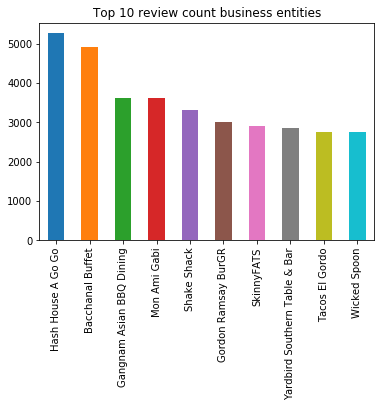

In [40]:
df_final.name.value_counts()[:10].plot(kind = 'bar', title = 'Top 10 review count business entities');

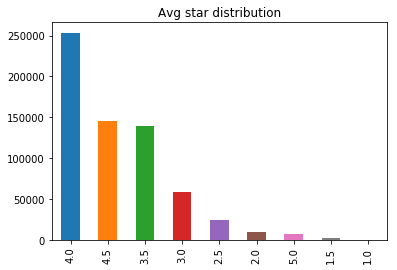

In [41]:
df_final.avg_stars.value_counts().plot(kind = 'bar', title = 'Avg star distribution');

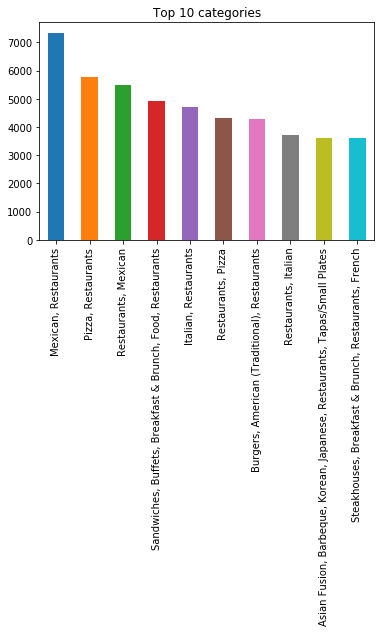

In [42]:
df_final.categories.value_counts()[:10].plot(kind = 'bar', title = 'Top 10 categories');

## Save your preprocessed dataset to csv file

* Respect your laptop's hard work! You don't want to make it run everything again.

In [43]:
# Save to ./data/last_2_years_restaurant_reviews.csv for your next task
df_final.to_csv('dataset/last_2_years_restaurant_reviews.csv', index = False)